In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df = pd.read_csv('D:\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\User\AppData\Local\Temp\ipykernel_16788\3129965082.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')


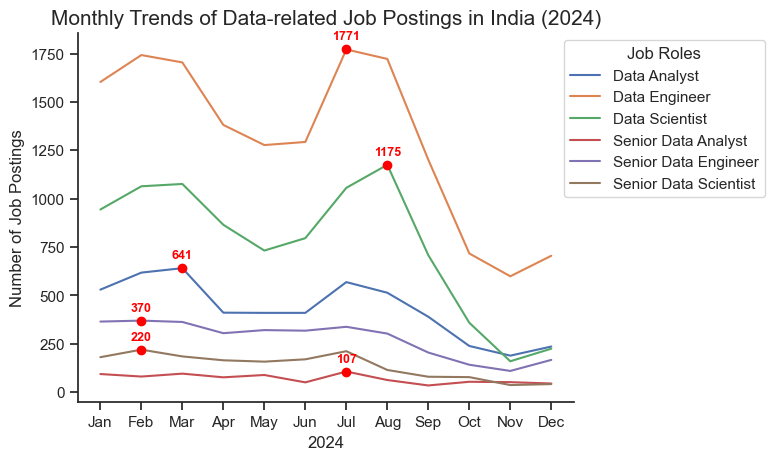

In [28]:
# FINAL

from adjustText import adjust_text

df_Data_IN_2024 = (df[
    (df['job_posted_date'].dt.year == 2024) &
    (df['job_country'] == 'India') &
    (df['job_title_short'].str.contains('Data', case=False))
    ].copy()
)

df_Data_IN_2024['job_posted_month_no'] = df_Data_IN_2024['job_posted_date'].dt.month

df_pivot = df_Data_IN_2024.pivot_table(
    index='job_posted_month_no',
    columns='job_title_short',
    aggfunc='size'
)

df_pivot = df_pivot.reset_index()
df_pivot['job_posted_month'] = pd.to_datetime(df_pivot['job_posted_month_no'], format='%m').dt.strftime('%b')
df_pivot.set_index('job_posted_month', inplace=True)
df_pivot.drop(columns='job_posted_month_no', inplace=True)

sns.set_theme(style='ticks')

ax = sns.lineplot(data=df_pivot, dashes=False)
sns.despine()

plt.title('Monthly Trends of Data-related Job Postings in India (2024)', fontsize=15)
plt.xlabel('2024')
plt.ylabel('Number of Job Postings')
plt.legend(
    title='Job Roles',
    loc='upper right',
    bbox_to_anchor=(1.4, 1)
)

for job_role in df_pivot.columns:
    y_max1 = df_pivot[job_role].max()
    x_max1 = df_pivot[job_role].idxmax()

    ax.scatter(x_max1, y_max1, color='red', zorder=5)
    ax.text(x_max1, y_max1 + 50, y_max1, ha='center', color='red', fontsize=9, fontweight='bold')

# last_values = df_pivot.iloc[-1, :]
# 
# for i, val in enumerate(last_values):
#     plt.text(11.2, val, df_pivot.columns[i])

plt.show()

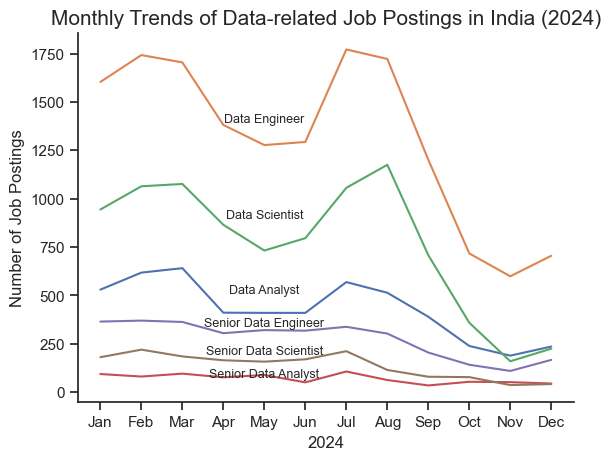

In [17]:
from adjustText import adjust_text

df_Data_IN_2024 = (df[
    (df['job_posted_date'].dt.year == 2024) &
    (df['job_country'] == 'India') &
    (df['job_title_short'].str.contains('Data', case=False))
    ].copy()
)

df_Data_IN_2024['job_posted_month_no'] = df_Data_IN_2024['job_posted_date'].dt.month

df_pivot = df_Data_IN_2024.pivot_table(
    index='job_posted_month_no',
    columns='job_title_short',
    aggfunc='size'
)

df_pivot = df_pivot.reset_index()
df_pivot['job_posted_month'] = pd.to_datetime(df_pivot['job_posted_month_no'], format='%m').dt.strftime('%b')
df_pivot.set_index('job_posted_month', inplace=True)
df_pivot.drop(columns='job_posted_month_no', inplace=True)

sns.set_theme(style='ticks')

sns.lineplot(data=df_pivot, dashes=False, legend=False)
sns.despine()

plt.title('Monthly Trends of Data-related Job Postings in India (2024)', fontsize=15)
plt.xlabel('2024')
plt.ylabel('Number of Job Postings')
# plt.legend(
#     title='Job Roles',
#     loc='upper right',
#     bbox_to_anchor=(1.4, 1)
# )

mid_idx = len(df_pivot) // 2 # // artinya floor, len(df_pivot) hasilnya 12 karena ada 12 rows untuk 12 bulan, jadi hasilnya 6
mid_x = mid_idx

# Kasih label di tengah tiap line
for col in df_pivot.columns:
    y_val = df_pivot[col].iloc[mid_idx-1]
    plt.text(
        x=mid_x -2,
        y=y_val + 25 if 'Senior' in col else y_val + 100,  # offset 5% biar gak nabrak line
        s=col,
        ha="center",
        fontsize=9
    )

plt.show()

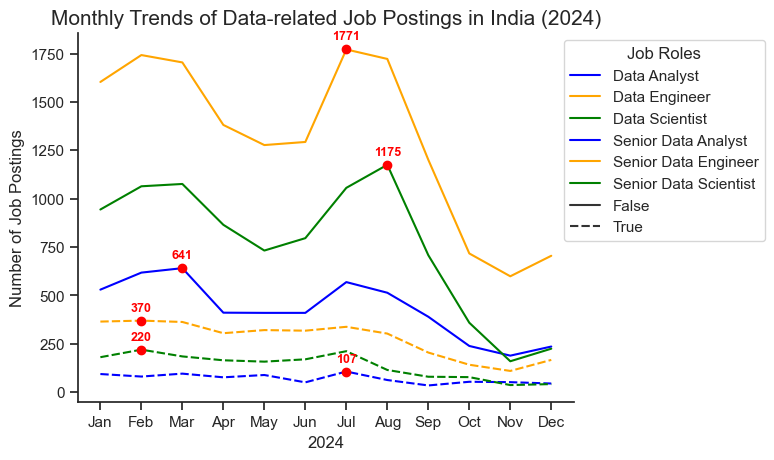

In [31]:
# test2 ubah warna grafik

from adjustText import adjust_text

df_Data_IN_2024 = (df[
    (df['job_posted_date'].dt.year == 2024) &
    (df['job_country'] == 'India') &
    (df['job_title_short'].str.contains('Data', case=False))
    ].copy()
)

df_Data_IN_2024['job_posted_month_no'] = df_Data_IN_2024['job_posted_date'].dt.month

df_pivot = df_Data_IN_2024.pivot_table(
    index='job_posted_month_no',
    columns='job_title_short',
    aggfunc='size'
)

df_pivot = df_pivot.reset_index()
df_pivot['job_posted_month'] = pd.to_datetime(df_pivot['job_posted_month_no'], format='%m').dt.strftime('%b')
df_pivot.set_index('job_posted_month', inplace=True)
df_pivot.drop(columns='job_posted_month_no', inplace=True)

role_colors = {
    'Data Analyst': 'blue',
    'Senior Data Analyst': 'blue',
    'Data Engineer': 'orange',
    'Senior Data Engineer': 'orange',
    'Data Scientist': 'green',
    'Senior Data Scientist': 'green'
}

df_pivot_long = df_pivot.reset_index().melt(
    id_vars='job_posted_month', # kolom yang mau dipertahankan
    var_name='job_role', # kolom baru → asal nama kolom lama (role)
    value_name='count' # kolom baru → isi nilai
)

sns.set_theme(style='ticks')

ax = sns.lineplot(
    data=df_pivot_long,
    x='job_posted_month',
    y='count',
    palette=role_colors, 
    hue='job_role', 
    style=df_pivot_long['job_role'].str.contains('Senior'),
    legend="brief"
)
sns.despine()

plt.title('Monthly Trends of Data-related Job Postings in India (2024)', fontsize=15)
plt.xlabel('2024')
plt.ylabel('Number of Job Postings')
plt.legend(
    title='Job Roles',
    loc='upper right',
    bbox_to_anchor=(1.4, 1)
)

for job_role in df_pivot.columns:
    y_max1 = df_pivot[job_role].max()
    x_max1 = df_pivot[job_role].idxmax()

    ax.scatter(x_max1, y_max1, color='red', zorder=5)
    ax.text(x_max1, y_max1 + 50, y_max1, ha='center', color='red', fontsize=9, fontweight='bold')

plt.show()

In [7]:
df_pivot

job_title_short,Data Analyst,Data Engineer,Data Scientist,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist
job_posted_month,,,,,,
Jan,530,1603,944,94,365,181
Feb,618,1742,1064,81,370,220
Mar,641,1704,1076,96,363,185
Apr,411,1381,865,77,305,165
May,410,1277,732,89,321,158
Jun,410,1293,796,51,318,170
Jul,569,1771,1056,107,338,212
Aug,514,1722,1175,63,303,115
Sep,390,1201,708,35,205,80


In [10]:
df_pivot['Data Engineer'].idxmax()

'Jul'